In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from datetime import datetime, timedelta
import pickle
import ipywidgets as widgets

plt.rcParams['legend.fontsize'] = 10

## GPS_Stations Class
The `GPS_Stations` class is a wrapper for a data dictionary, `{Name: time series data}`. The time series data is an Nx4 ndarray, where N is the number of dates, from 2011/4/1 to 2016/12/31. The 4 columns correspond to date (`datetime` type), east, north and up components (all `float` type).

In [2]:
class GPS_Stations():
    def __init__(self):
        self.data = {}
    def add(self, station_name, date, x, y, z):
        if station_name in self.data:
            # if the station is already in the data dictionary, append a new row of data [date,x,y,z]
            self.data.update( {station_name : np.append( self.data[station_name], np.array([date,x,y,z]).reshape(1,4), axis=0 ) } )
        else: # if first time adding this station, create a key:data pair.
            self.data.update( {station_name : np.array([date,x,y,z]).reshape(1,4)} )

## Loading Data
If a pickled data object exists, load and use it as an instance of `GPS_Stations` class named `Korea_GPS_Stations`. If not, i.e., `DATA_EXISTS==False`, read the data files retrived from the repository associated with (Kim et al., Tectonics, 2018) to create and populate an instance of `GPS_Stations` named `Korea_GPS_Stations`. The newly created object is pickled for later use. 

In [3]:
DATA_EXISTS = False
Korea_GPS_Stations = pickle.load( open( "Korea_GPS_Stations.p", "rb" ) )
if Korea_GPS_Stations:
    DATA_EXISTS = True
    print("Data object exists")

Data object exists


In [4]:
if DATA_EXISTS == False:
    data_dir = "GPS Daily Coordinate data (2011 to 2016)/Coordinate"
    Korea_GPS_Stations = GPS_Stations()
    years = np.arange(2011,2017)
    #print(years)
    networks = np.array(['KASI', 'NGII'])
    #print(networks)
    for yr in years:
        for nt in networks:
            path = "./{0:s}/{1}/{2}".format(data_dir, yr, nt)
            #print(path)
            for f in os.listdir(path):
                fname = "{0}/{1}".format(path,f)
                fi = open(fname, 'r')
                lines = fi.readlines()
                date = np.datetime64(lines[2].split()[5]).astype(datetime)
                if date == datetime(2012,6,1): # exclude outlier
                    continue
                linecount = 7
                for line in lines[7:]:
                    linecount += 1
                    fields = line.split()
                    fieldnum = len(fields)
                    if fieldnum == 6:   # valid data without 'Name' field
                        name = fields[1]
                        x = float(fields[2])
                        y = float(fields[3])
                        z = float(fields[4])
                    elif fieldnum == 7: # valid data with all the fields filled
                        name = fields[1]
                        x = float(fields[3])
                        y = float(fields[4])
                        z = float(fields[5])
                    elif fieldnum == 5:   # invalid data with 0 0 0 coordinates
                        continue  # move on to the next line
                    elif fieldnum <= 1: # bottom blank lines
                        break     # stop processing this file
                    else:               # None of the above. Abort
                        print("Problem with line {0} in {1}".format(linecount, fname))
                        break     # stop processing this file
                    #print(fname, line)
                    Korea_GPS_Stations.add(name, date, x, y, z)
                fi.close()
    
    # delete problematic stations
#     problematic_stations = ['TABK', 'GOJE', 'GANH', 'BONH', 'SEJO', 'ULLE', 'SOUL', 'JEOJ', 'HOMI', 'DOKD', 'DONH', 'CHUL', 'DANJ', 'GOSG', 'HCHN', 'SMAN']
#     for s in problematic_stations:
#         Korea_GPS_Stations.data.pop(s, None)
    
    # Store the data object for quicker loading later
    pickle.dump(Korea_GPS_Stations, open( "Korea_GPS_Stations.p", "wb" ) )

If the data are loaded successfully, the data object, `Korea_GPS_Stations`, should contain 75 stations, each of which have a position time series spanning 2011/04/01 to 2016/12/31.

In [6]:
# Verify the loaded data if desired.
scounter = 0
for s in Korea_GPS_Stations.data.keys():
    scounter += 1
    print(scounter, s, Korea_GPS_Stations.data[s][0,0], Korea_GPS_Stations.data[s][-1,0])

1 DAEJ 2011-04-01 2016-12-31
2 JEJU 2011-04-01 2016-12-31
3 KOHG 2011-04-01 2016-12-31
4 MKPO 2011-04-01 2016-12-31
5 MLYN 2011-04-01 2016-12-31
6 SBAO 2011-04-01 2016-12-31
7 SKCH 2011-04-01 2016-12-31
8 SKMA 2011-04-01 2016-12-31
9 ANSG 2011-04-01 2016-12-31
10 BOEN 2011-04-01 2016-12-31
11 CHCN 2011-04-01 2016-12-31
12 CHEN 2011-04-01 2016-12-31
13 CHJU 2011-04-01 2016-12-31
14 CHLW 2011-04-01 2016-12-31
15 CHNG 2011-04-01 2016-12-31
16 CHSG 2011-04-01 2016-12-31
17 CHWN 2011-04-01 2016-12-31
18 CHYG 2011-04-01 2016-12-31
19 CNJU 2011-04-01 2016-12-31
20 DOKD 2011-04-01 2013-09-12
21 DOND 2011-04-01 2016-12-31
22 EOCH 2011-04-01 2016-12-31
23 GOCH 2011-04-01 2016-12-31
24 GSAN 2011-04-01 2016-12-31
25 HADG 2011-04-01 2016-12-31
26 HOMI 2011-04-01 2016-12-31
27 HONC 2011-04-01 2016-12-31
28 INCH 2011-04-01 2016-12-31
29 INJE 2011-04-01 2016-12-31
30 JAHG 2011-04-01 2016-12-31
31 JEOJ 2011-04-01 2016-12-31
32 JINJ 2011-04-01 2016-12-31
33 JUNG 2011-04-01 2016-12-31
34 JUNJ 2011-04-01 

In [7]:
def get_station_data( station, start_datetime=datetime(2011, 4, 1), end_datetime=datetime(2016, 12, 31) ):
    """
    Retrieves a station's data from start_datetime to end_datetime (all inclusive)
    and returns 4 arrays of daily time series, date, easting, northing and up.
    Note that position components are shifted to be zero on the starting date.
    """
    data = Korea_GPS_Stations.data[station]
    start_date = start_datetime.date()
    end_date = end_datetime.date()
    
    datemask = np.logical_and(data[:,0] >= start_date, data[:,0] <= end_date)
    start_index = np.where(data[:,0] == start_date)[0]
    
    date = data[datemask,0]
    easting  = data[start_index,1] - data[datemask,   1]
    northing = data[datemask,   2] - data[start_index,2]
    up       = data[datemask,   3] - data[start_index,3]
    #print(data[start_index,2], data[start_index,3])
    #print(len(date), len(data[:,0]))
    
    return date, easting, northing, up

def plot_selected_station( selected_station, start_datetime=datetime(2011, 4, 1), 
                          end_datetime=datetime(2016, 12, 31) ):
    """
    plot the east, north and up position time series for a selected station 
    from a start date until an end date.
    """
    d, e, n, u = get_station_data(selected_station, start_datetime, end_datetime)

    fig = plt.figure()
    ax = fig.add_subplot()

    ax.plot(d, e, 'ro', markersize=2, label="east")
    ax.plot(d, n, 'go', markersize=2, label="north")
    ax.plot(d, u, 'bo', markersize=2, label="up")
    ax.set_title(selected_station)
    ax.set_ylabel('Displacement (m)')
    ax.set_ylim((-0.1,0.1))
    ax.legend(loc=2)

In [8]:
def eltm(days, p, q, sa, ca, sh, ch, a):
    from numpy import sin, cos, log   
    wa = 2.0*np.pi/365.0  # annual frequency
    wh = 4.0*np.pi/365.0  # semi-annual frequency
    dd_eq = (datetime(2011, 4, 1)-datetime(2011, 3, 11)) / timedelta(days=1)
    dd = 2.0*(days + dd_eq)/365.0 # time scale: half a year
    disp = (p*days+q) + sa * sin(wa*days) + ca * cos(wa*days) + sh * sin(wh*days) + ch * cos(wh*days) 
    + a * log(1.0+dd)
    return disp

In [9]:
def eltm2(day, p, q, sa, ca, sh, ch, a):
    days = day.astype(float)
    from numpy import sin, cos, log   
    wa = 2.0*np.pi/365.0  # annual frequency
    wh = 4.0*np.pi/365.0  # semi-annual frequency
    dd_eq = 20.0 #(datetime(2011, 4, 1)-datetime(2011, 3, 11)) / timedelta(days=1)
    dd = 2.0*(days + dd_eq)/365.0 # time scale: half a year
    print(sa, wa, np.sin(days))
    disp = (p*days+q) + sa * sin(wa*days) + ca * cos(wa*days) + sh * sin(wh*days) + ch * cos(wh*days) 
    + a * log(1.0+dd)
    return disp

In [10]:
station_selector = widgets.Select(
    options=Korea_GPS_Stations.data.keys(),
    value='DAEJ',
    rows=10,
    description='Select a GPS station:',
    disabled=False
)
display(station_selector)

Select(description='Select a GPS station:', options=('DAEJ', 'JEJU', 'KOHG', 'MKPO', 'MLYN', 'SBAO', 'SKCH', '…

0.00417170536290304 0.01721420632103996 [ 0.          0.84147098  0.90929743 ...  0.58764868 -0.36333988
 -0.98027542]


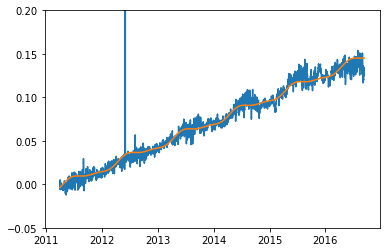

In [131]:
selected_station = station_selector.value
d, e, n, u = get_station_data(selected_station, datetime(2011, 4, 1), end_datetime=datetime(2016, 9, 11))
from scipy.optimize import curve_fit
days_float = (d-datetime(2011, 4, 1).date()) / timedelta(days=1)
popt, pcov = curve_fit(eltm, days_float, e)
plt.plot(d, e)
plt.ylim((-0.05,0.2))
plt.plot(d, eltm2(days_float, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6]))

[4049011.92407] [3659187.89995]


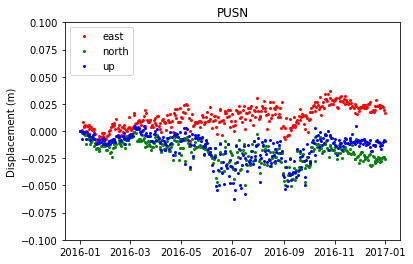

In [55]:
selected_station = station_selector.value
plot_selected_station( selected_station, datetime(2016, 1, 1), end_datetime=datetime(2016, 12, 31)  )    

In [13]:
station_selector.value

'SBAO'

0
[268] [False False False ...  True  True  True]
[274] [False False False ...  True  True  True]
[273] [False False False ...  True  True  True]
[271] [False False False ...  True  True  True]
[274] [False False False ...  True  True  True]
[270] [False False False ...  True  True  True]
1
[273] [False False False ...  True  True  True]
[273] [False False False ...  True  True  True]
[275] [False False False ...  True  True  True]
[275] [False False False ...  True  True  True]
[275] [False False False ...  True  True  True]
[275] [False False False ...  True  True  True]
2
[274] [False False False ...  True  True  True]
[275] [False False False ...  True  True  True]
[272] [False False False ...  True  True  True]
[274] [False False False ...  True  True  True]
[275] [False False False ...  True  True  True]
[275] [False False False ...  True  True  True]
3
[275] [False False False ...  True  True  True]
[232] [False False False False False False False False False False False False
 

KeyboardInterrupt: 

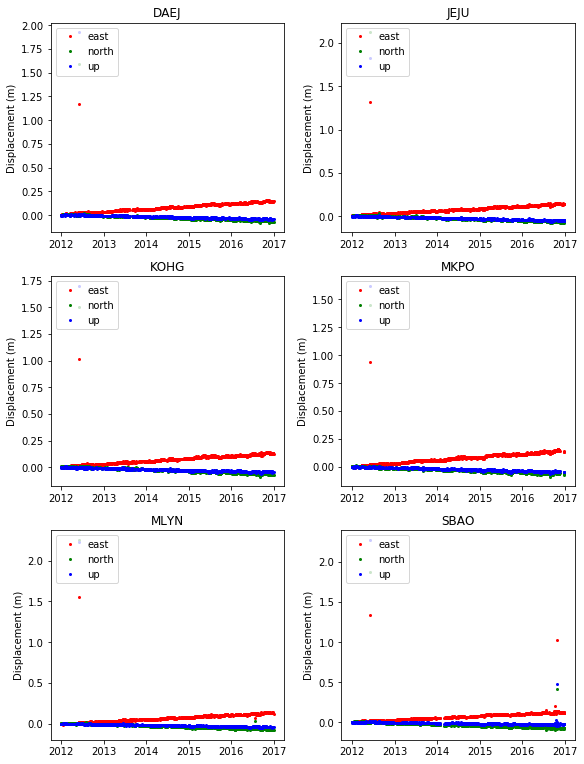

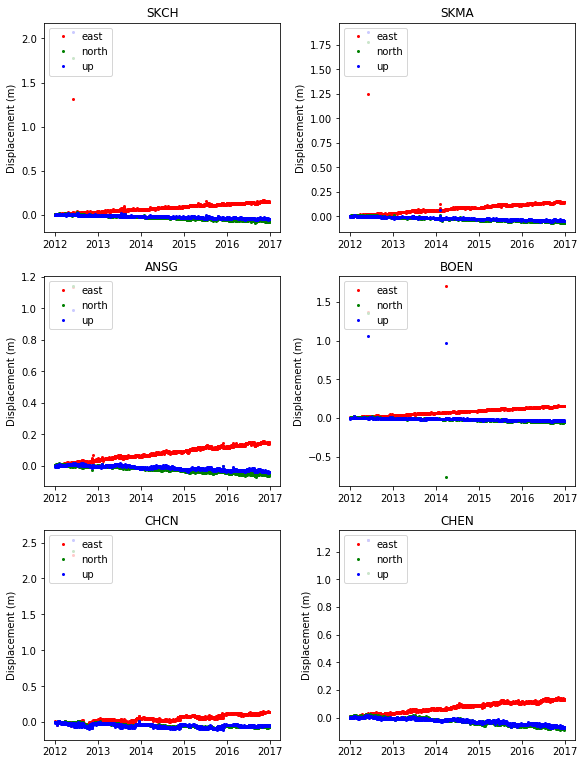

Error in callback <function flush_figures at 0x000002414D8D7CA8> (for post_execute):


KeyboardInterrupt: 

In [20]:
# count = 0
# fignum = 0
# panels_per_figure = 6
# fig = None
# spec2 = None
# for s in Korea_GPS_Stations.data.keys():
#     panel_id = count % panels_per_figure
#     #print(panel_id)
#     if panel_id == 0:
#         fignum = np.int(count / panels_per_figure)
#         print(fignum)
#         fig = plt.figure(constrained_layout=True, figsize=(8,10.5))
#         spec2 = gridspec.GridSpec(nrows=3, ncols=2,figure=fig)
    
#     row = np.int(panel_id / 2)
#     col = panel_id % 2
#     #print(s,fignum,row,col, spec2[row,col])
# #     if fignum > 0:
# #         break
#     ax = fig.add_subplot(spec2[row, col])
#     count += 1
    
#     data = Korea_GPS_Stations.data[s]
#     start_date = datetime(2012, 1, 1).date()
#     datemask = data[:,0] >= start_date
#     start_index = np.where(data[:,0] == start_date)[0]
#     print(start_index,datemask)
#     date = data[datemask,0]
#     easting = data[datemask,1]
#     eastref = data[start_index,1]
#     northing = data[datemask,2]
#     northref = data[start_index,2]
#     up = data[datemask,3]
#     upref = data[start_index,3]
#     ax.set_title(s)
#     try:
#         ax.plot(date, eastref-easting, 'ro', markersize=2, label="east")
#     except ValueError:
#         print("easting problem: ", s,start_date, date)
#     try:
#         ax.plot(date, northing-northref, 'go', markersize=2, label="north")
#     except ValueError:
#         print("northing problem: ", s,start_date, date)
#     try:
#         ax.plot(date, up-upref, 'bo', markersize=2, label="up")
#     except ValueError:
#         print("northing problem: ", s,start_date, date)        
#     ax.set_ylabel('Displacement (m)')
#     ax.legend(loc=2)
    
#     if panel_id == 5:
#         figname = "GPS_from_Kim_{0:02d}.png".format(fignum)
#         #print(figname)
#         plt.savefig(figname, papertype="letter")
